# Отчет по лабораторной №5
## по курсу "Системы аналитических вычислений"

### группа: М8О-207Б-19
### студент: Бирюков В. В.

## Расширенный алгоритм Евклида

In [1]:
x = .;
f = x^4 - 4*x^3 + 7*x^2 - 5*x + 1;
g = x^5 - x^4 - x^3 + x^2 + 5*x - 5;

TraditionalForm[f]
TraditionalForm[g]

FormBox[RowBox[{SuperscriptBox["x", "4"], "-", 

 
>        RowBox[{"4", " ", SuperscriptBox["x", "3"]}], "+", 

 
>        RowBox[{"7", " ", SuperscriptBox["x", "2"]}], "-", RowBox[{"5", " ", "x"}],\
 
>    "+", 
     "1"}], TraditionalForm]

FormBox[RowBox[{SuperscriptBox["x", "5"], "-", SuperscriptBox["x", "4"], "-", 

 
>        SuperscriptBox["x", "3"], "+", SuperscriptBox["x", "2"], "+", 

 
>        RowBox[{"5", " ", "x"}], "-", "5"}], TraditionalForm]

2       3                  2
          79 + 41 x - 8 x  - 21 x   40 - 55 x + 21 x
{-1 + x, {------------------------, -----------------}}
                    121                    121
True
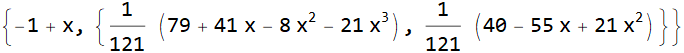

In [6]:
{gcd, {u, v}} = PolynomialExtendedGCD[f, g]
Simplify[gcd == f * u + g * v]

In [8]:
extGcd[aa_, bb_] := Module[{a=aa, b=bb, x0=1, xx=0, y0=0, yy = 1, q, r},
    While[Not[SameQ[b, 0]],
        q = PolynomialQuotient[a, b, x];
        r = PolynomialRemainder[a, b, x];
        {a, b} = {b, r};
        {x0, xx} = {xx, (x0 - xx*q)//ExpandAll};
        {y0, yy} = {yy, (y0 - yy*q)//ExpandAll};
    ];
    {a, x0, y0}
];

2       3                    2
   1936    1936 x  1264   656 x   128 x    16 x   640   880 x   16 x
{-(----) + ------, ---- + ----- - ------ - -----, --- - ----- + -----}
   441      441    441     441     441      21    441    441     21
True
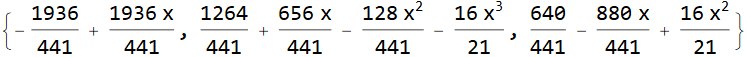

In [9]:
{gcd, u, v} = extGcd[f, g]
Simplify[gcd == f * u + g * v]

## Модель «хищник – жертва»

-Graphics-
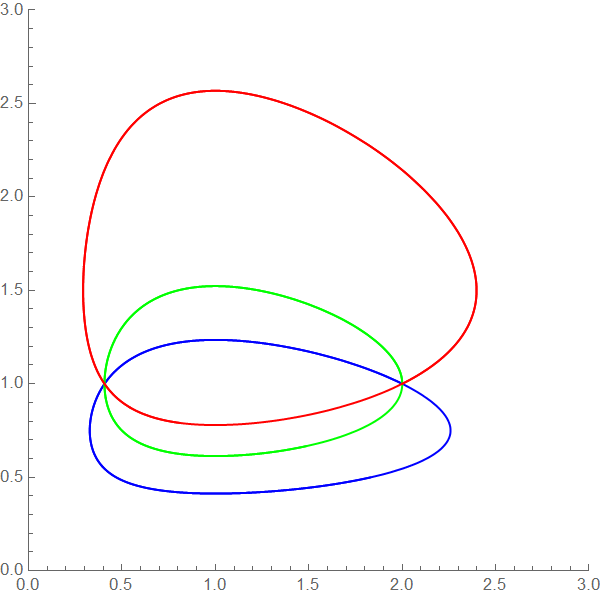

In [11]:
x = .
y = .
{a, c, d} = {3, 1, 1};
colors = {Red, Green, Blue};

plt = {};
For[b = 4, b > 1, b--,
    eq1[t_] := x'[t] == x[t] * (a - b * y[t]);
    eq2[t_] := y'[t] == y[t] * (-c + d * x[t]);
    sol = NDSolve[{eq1[t], eq2[t], x[0] == 2, y[0] == 1}, {x, y}, {t, 0, 7}, MaxSteps -> 3000];
    plt = Append[plt, ParametricPlot[Evaluate[{x[t], y[t]} /. sol], {t, 0, 7}, PlotRange -> {{0, 3}, {0, 3}}, PlotStyle -> colors[[b-1]]]]
]
Show[plt]

In [18]:
predatorPrey[aa_, bb_, cc_, dd_] := Module[{a = aa, b = bb, c = cc, d = dd},
    plt = {};
    eq1[t_] := x'[t] == x[t] * (a - b * y[t]);
    eq2[t_] := y'[t] == y[t] * (-c + d * x[t]);
    sol = NDSolve[{eq1[t], eq2[t], x[0] == 2, y[0] == 1}, {x, y}, {t, 0, 7}, MaxSteps -> 3000];
    plt = Append[plt, ParametricPlot[Evaluate[{x[t], y[t]} /. sol], {t, 0, 7}, PlotRange -> {{0, 3}, {0, 3}}]];
    plt
];
{min, max, step} = {1, 4, 1};
Manipulate[Show[predatorPrey[a, b, c, d]], {a, min, max, step}, {b, min, max, step}, {c, min, max, step}, {d, min, max, step}]

## Приведение уравнения поверхности к каноническому виду

In [21]:
x = .
y = .
z = .
u = .
v = .
u[x_, y_, z_] := 7*x^2 + 8*x*y + 3*y^2 + 8*x*z + 6*y*z + 3*z^2 + 6*x + y + 7;
u[x, y, z] // TraditionalForm

FormBox[RowBox[{RowBox[{"7", " ", SuperscriptBox["x", "2"]}], "+", 

 
>        RowBox[{"8", " ", "x", " ", "y"}], "+", RowBox[{"8", " ", "x", " ", "z"}], "+",\
 
>    
     RowBox[{"6", " ", "x"}], "+", RowBox[{"3", " ", SuperscriptBox["y", "2"]}],\
 
>    "+", 
     RowBox[{"6", " ", "y", " ", "z"}], "+", "y", "+", 

 
>        RowBox[{"3", " ", SuperscriptBox["z", "2"]}], "+", "7"}], TraditionalForm]

7   4   4

4   3   3

4   3   3
3

0.5

0
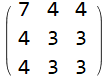
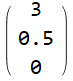

In [28]:
A = {
    {7, 4, 4},
    {4, 3, 3},
    {4, 3, 3}   
};
B = {{3}, {0.5}, {0}};
a0 = 7;

MatrixForm[A]
MatrixForm[B]

7 - l   4       4

4       3 - l   3

4       3       3 - l
            2    3
-10 l + 13 l  - l
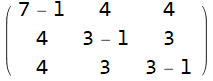

In [33]:
(* Характеристический многочлен *)
l = .
AE[l_] := A - IdentityMatrix[3] * l;
MatrixForm[AE[l]]

charPoly = Det[AE[l]]

In [38]:
(* Собственные значения *)
sols = Solve[charPoly == 0, l];
eigenValues = l /. sols;
MatrixForm[N[eigenValues], TableDirections -> Row]

0.       0.821092 12.1789

{x -> 0, z -> -y}
{0., 1., -1.}
        1  (29 - 3 Sqrt[129]) x         1  (29 - 3 Sqrt[129]) x
{y -> -(-) --------------------, z -> -(-) --------------------}
        4    -13 + Sqrt[129]            4    -13 + Sqrt[129]
{1., -0.772364, -0.772364}
        1  (-29 - 3 Sqrt[129]) x         1  (-29 - 3 Sqrt[129]) x
{y -> -(-) ---------------------, z -> -(-) ---------------------}
        4     13 + Sqrt[129]             4     13 + Sqrt[129]
{1., 0.647364, 0.647364}
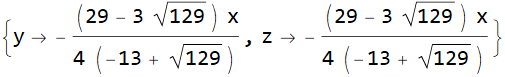
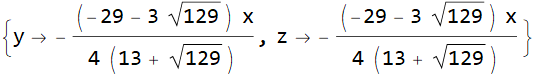

In [42]:
(* Собственные векторы *)
variables = {x, y, z};

vector1 = Solve[AE[eigenValues[[1]]] . variables == 0][[1]]
(* Возьмем y = 1 *)
vector1 = variables /. vector1 /. y -> 1;
N[vector1]

vector2 = Solve[AE[eigenValues[[2]]] . variables == 0][[1]]
(* Возьмем x = 1 *)
vector2 = variables /. vector2 /. x -> 1;
N[vector2]

vector3 = Solve[AE[eigenValues[[3]]] . variables == 0][[1]]
(* Возьмем x = 1 *)
vector3 = variables /. vector3 /. x -> 1;
N[vector3]

eigenVectors = {vector1, vector2, vector3};

In [57]:
(* Проверка собственных значений и векторов *)
{values, vectors} = Eigensystem[A];
N[values]
N[vectors]

{12.1789, 0.821092, 0.}
{{1.54473, 1., 1.}, {-1.29473, 1., 1.}, {0., -1., 1.}}

0.          0.675261    0.737579

0.707107    -0.521547   0.477482

-0.707107   -0.521547   0.477482
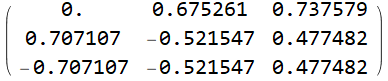

In [61]:
(* Матрица перехода из нормированых собственных векторов *)
S = Map[Normalize, eigenVectors] // Transpose;
MatrixForm[N[S]]

0.              0.              0.

                                          -16
0.              0.821092        7.77156 10


0.              0.              12.1789
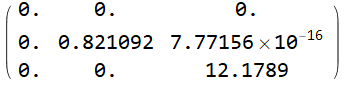

In [64]:
(* Диагональная матрица *)
A1 = Transpose[S] . A . S;
MatrixForm[N[A1]]

0.353553

1.76501

2.45148
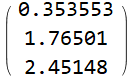

In [67]:
(* Преобразование коэффициентов линейной формы *)
B1 = Transpose[S] . B;
MatrixForm[N[B1]]

In [70]:
(* Почти приведенное уравнение *)
v = (Transpose[variables] . A1 . variables + Transpose[variables] . B1 + a0)[[1]];
Simplify[v] // TraditionalForm

FormBox[RowBox[{RowBox[{"0.35355339059326957`", " ", "x"}], "+", 

 
>        RowBox[{"0.8210916541996776`", " ", SuperscriptBox["y", "2"]}], "+", 

 
>        RowBox[{"y", " ", RowBox[{"(", 

 
>            RowBox[{RowBox[{"5.1248987806356226`*^-14", " ", "z"}], "+", 

 
>              "1.7650095814831261`"}], ")"}]}], "+", 

 
>        RowBox[{"12.178908345800016`", " ", SuperscriptBox["z", "2"]}], "+", 

 
>        RowBox[{"2.4514773458615755`", " ", "z"}], "+", "6.999999999999903`"}], 

 
>      TraditionalForm]

In [73]:
(* Приведенное уравнение *)
v = 0;
a1 = a0;

(* Убираем линейные члены, приводя к полному квадрату, где это возможно *)
For[i = 1, i <= Length[variables], i++,
    If[A1[[i, i]] != 0,
        v += A1[[i, i]] * (variables[[i]] + B1[[i, 1]] / A1[[i, i]]) ^ 2;
        a1 -= B1[[i, 1]] ^ 2 / A1[[i, i]],
    (*Else*)
        v += 2 * B1[[i, 1]] * variables[[i]]
    ]
]
v = ((v + a1) / a1) // N;
(* Превращаем в функцию *)
v = Function[{x, y, z}, Evaluate[v]];

v[x, y, z] // TraditionalForm

FormBox[RowBox[{"0.3686635944700463`", " ", 

 
>        RowBox[{"(", RowBox[{RowBox[{"0.7071067811865475`", " ", "x"}], "+", 

 
>            RowBox[{"0.8210916541997262`", " ", 

 
>              SuperscriptBox[RowBox[{"(", RowBox[{"y", "+", "2.1495889922342357`"}], 

 
>                 ")"}], "2"]}], "+", RowBox[{"12.17890834580027`", " ", 

 
>              SuperscriptBox[RowBox[{"(", RowBox[{"z", "+", "0.20128875891466744`"}], 

 
>                 ")"}], "2"]}], "+", "2.712499999999998`"}], ")"}]}], TraditionalForm]

-Graphics3D-
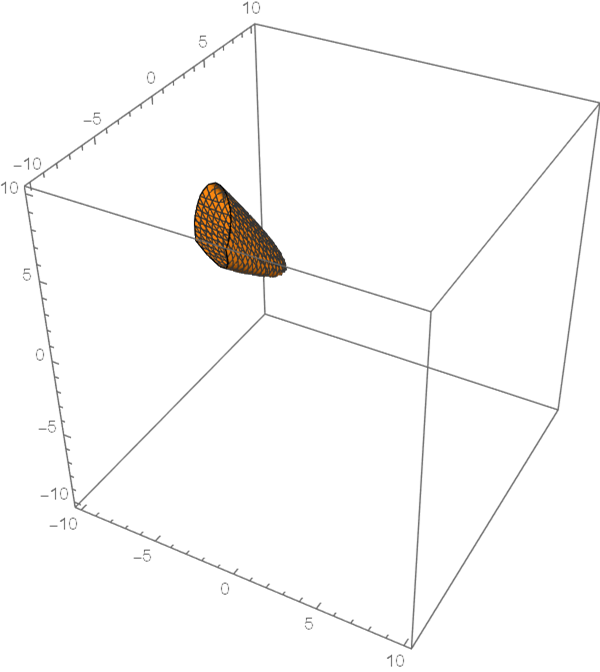

In [82]:
ContourPlot3D[u[x, y, z] == 0, {x, -10, 10}, {y, -10, 10}, {z, -10, 10}]

-Graphics3D-
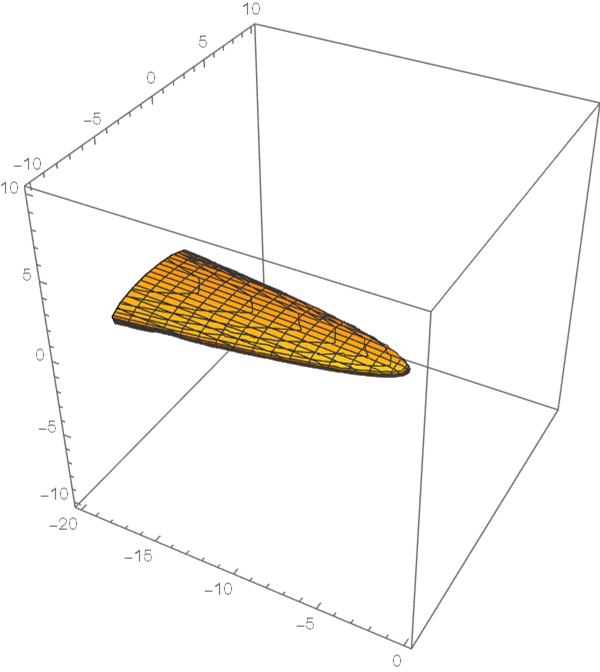

In [83]:
ContourPlot3D[v[x, y, z]==0, {x, -20, 0}, {y, -10, 10}, {z, -10, 10}]